In [1]:
# Librerías para datos
import pandas as pd
import numpy as np

# Librerías de imputación
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [7]:
df_pair8= pd.read_csv('merchant_fill.csv')
df_pair8.sample(2)

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,average_discount,mean_discount,mean_product_ratings_count
515,515,Fashion Summer Lady Skull Print Beauty Vest Ha...,9.00,48,1000,1,4.01,135,69.0,25.0,23.0,10.0,8.0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,Livraison standard,3,0,25,50,CN,oiug56465,78 % avis positifs,6632,3.748794,5b6ec2f2838d931d2fbf7a28,https://www.wish.com/c/5e180dab29a9690a38a1748f,5e180dab29a9690a38a1748f,1,1000,1000.0,3.749,6632.0,9.00,48.0,82.0,82.0,135.0
1238,1238,Stranger Things saison 3 T-shirt femmes à l'en...,3.73,17,100,1,4.37,27,17.0,7.0,1.0,0.0,2.0,0,1,0,"blouse,Summer,Shorts,Grunge,letter print,Sleev...",white,25-S,Livraison standard,1,0,48,50,CN,unlimitedretaliation,94 % avis positifs,343,4.521866,5b07dc937752c81ecb291b66,https://www.wish.com/c/5e8c600e60f3076f85bf2d73,5e8c600e60f3076f85bf2d73,1,100,100.0,4.522,343.0,3.73,17.0,79.0,79.0,27.0


In [4]:
df_pair8.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'product_url', 'product_id', 'listed_products',
       'total_units_sold', 'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'average_discount', 'mean_discount', 'mean_product_ratings_count'],
      dtype='object')

# 1 ¿Qué porcentaje de productos tiene el distintivo "Producto local"?

Text(0.5, 82.45136681500321, '0 = Sí (tiene distintivo)\n1 = No (no tiene distintivo)')

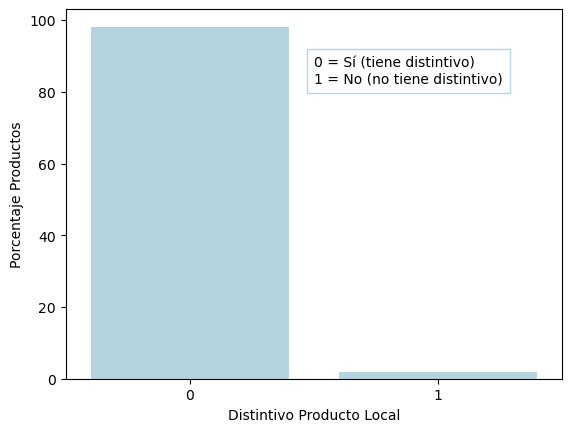

In [39]:
sns.countplot(x = "badge_local_product", 
              data = df_pair8,
              color = "lightblue",stat= 'percent') # con el stat añadimos en el eje y los % en lugar de la cantidad

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Distintivo Producto Local")
plt.ylabel("Porcentaje Productos")
plt.text(x=0.5, y=plt.ylim()[1]*0.8,  # posición: centrado en x, alto en y
         s="0 = Sí (tiene distintivo)\n1 = No (no tiene distintivo)",  # texto
         bbox=dict(facecolor="white", edgecolor="lightblue", boxstyle="square,pad=0.5"),  # estilo de caja
         ha="left")

In [15]:
df_pair8['badge_local_product'].unique()

array([0, 1])

In [42]:
df_distivo= df_pair8.groupby('badge_local_product')["product_id"].count().reset_index()
print(1544/(1544+29))
df_distivo

0.9815638906547998


,badge_local_product,product_id
0,0,1544
1,1,29


# Interpretación:
- Podemos observar que existe un mayor porcentaje de productos que si tienen distintivo local, 98% frente a un minimo porcentaje (2%) de no distintivo. 

# 2 ¿Qué porcentaje de productos tiene el distintivo "Buena calidad del producto".

Text(0.5, 77.7520661157025, '0 = Buena \n1 = Excelente')

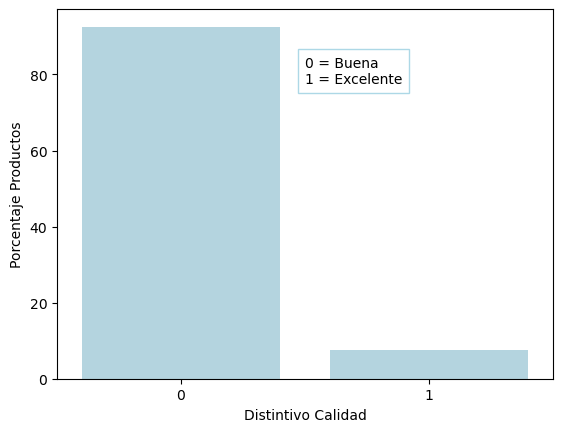

In [46]:
sns.countplot(x = "badge_product_quality", 
              data = df_pair8,
              color = "lightblue",stat= 'percent') # con el stat añadimos en el eje y los % en lugar de la cantidad

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Distintivo Calidad")
plt.ylabel("Porcentaje Productos")
plt.text(x=0.5, y=plt.ylim()[1]*0.8,  # posición: centrado en x, alto en y
         s="0 = Buena \n1 = Excelente",  # texto
         bbox=dict(facecolor="white", edgecolor="lightblue", boxstyle="square,pad=0.5"),  # estilo de caja
         ha="left")

In [48]:
df_quality= df_pair8.groupby('badge_product_quality')["product_id"].count().reset_index()
df_quality

,badge_product_quality,product_id
0,0,1456
1,1,117


In [49]:
print(1456/(1456+117))

0.9256198347107438


# Interpretación:
- Tenemos como categoria dominante la calidad "buena" con el 93% frente al 7% de excelente calidad.

# 3 ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

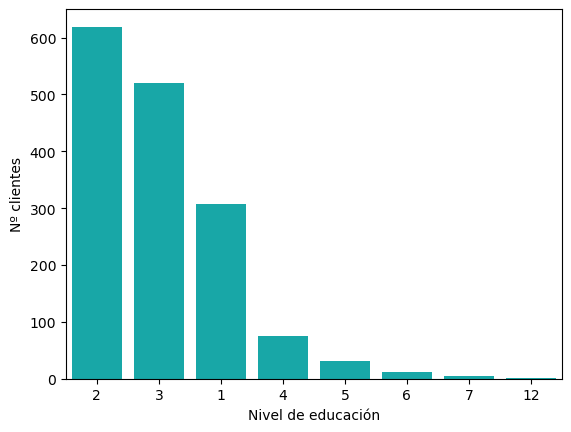

In [ ]:
sns.countplot(x = "shipping_option_price", 
              data = df_pair8,
              color = "c",
              order = ['2','3','1','4','5','6','7','12'])


# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 0)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Nivel de educación")
plt.ylabel("Unidades vendidas");

/var/folders/ms/7jvq50_d0x17gf92g_mnlzp40000gn/T/ipykernel_4568/753466285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "shipping_option_price",
/var/folders/ms/7jvq50_d0x17gf92g_mnlzp40000gn/T/ipykernel_4568/753466285.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "shipping_option_price",
/var/folders/ms/7jvq50_d0x17gf92g_mnlzp40000gn/T/ipykernel_4568/753466285.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "shipping_option_price",


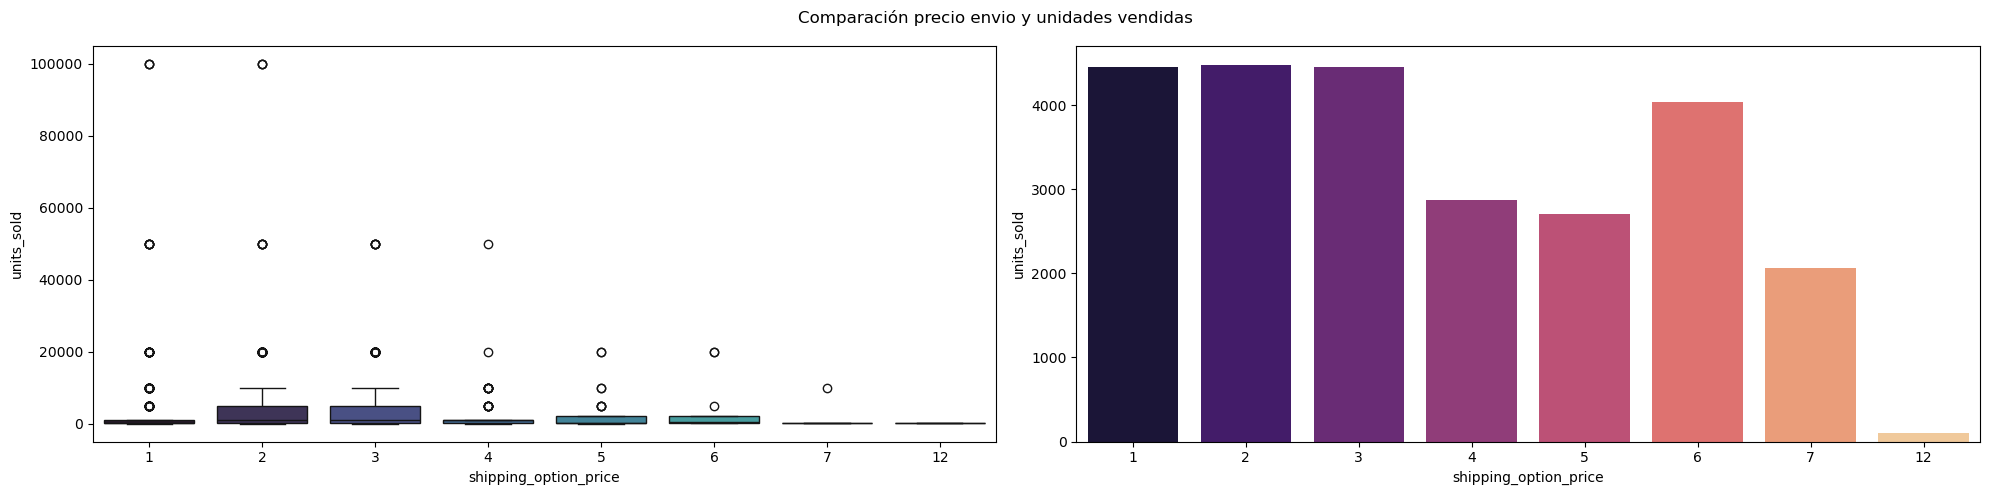

In [53]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "shipping_option_price", 
            y = "units_sold", 
            data = df_pair8, 
            ax = axes[0], 
            palette= "mako")


# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "shipping_option_price", 
            y = "units_sold", 
            data = df_pair8,
            ci = None,
            ax = axes[1], 
            palette = "magma")


# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación precio envio y unidades vendidas")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

# interpretación:
- Vemos que en la categoria 2 y 3 el 50% central estan mas dispersos que en el resto de las categorias. (Rango intercuartilico es más grande).
- Las categorias de envio con un promedio mas alto de unidades vendidas son las categorias 1, 2 y 3. Mientras que la categoria 6 se ubica en un segundo grupo de forma aislada y, por ultimo, las categorias 4, 5 y 7 presentan un menor promedio de unidades vendidas.
Esto puede deberse a que las categorias 1, 2, 3 y 4 tienen outliers muy altos que hacen aumentar el promedio.

- No es posible identificar las medianas con precisión, no es muy diferenciable el nivel entre categorias. Por lo que, hasta el 50% de observaciones las categorias no tendrian diferencia en unidades vendidas, encontrariamos las diferencia mayor en el top 50, donde vemos mayor correlación negativa.

# 4 ¿Qué países reciben más productos de este conjunto de datos? Muestra un gráfico de barras horizontales.

In [63]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

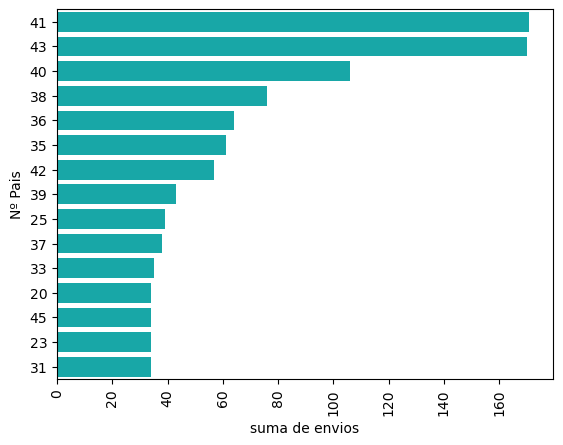

In [67]:
# Contar los valores y ordenarlos de mayor a menor
orden_pais = df_pair8['countries_shipped_to'].value_counts().nlargest(15).index

# Crear el gráfico de barras con los valores ordenados
sns.countplot(y='countries_shipped_to', data=df_pair8, color = 'c', order=orden_pais, orient= 'v')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Cambiar los nombres de los ejes
plt.xlabel("suma de envios")
plt.ylabel("Nº Pais")

# Mostrar la gráfica
plt.show()

In [81]:
orden_pais= df_pair8.groupby('countries_shipped_to').agg({'units_sold': ['sum']}).reset_index()
orden_pais = orden_pais.sort_values(by='units_sold', ascending=False) #Descending order
orden_pais

ValueError: The column label 'units_sold' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

ValueError: Names should be list-like for a MultiIndex

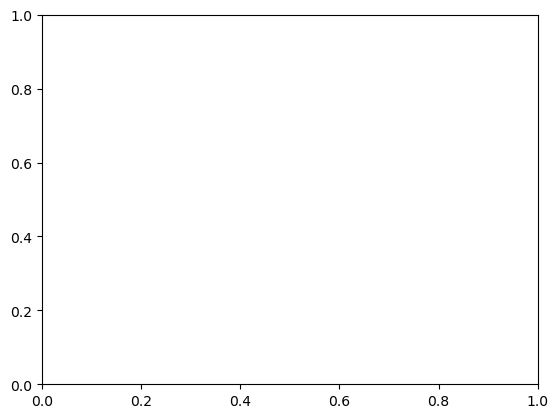

In [73]:
# Contar los valores y ordenarlos de mayor a menor
orden_pais= df_pair8.groupby('countries_shipped_to').agg({'units_sold': ['sum']}).reset_index()


# Crear el gráfico de barras con los valores ordenados
sns.countplot(y='countries_shipped_to', data=df_pair8, color = 'c', order=orden_pais, orient= 'v')

# Girar las etiquetas del eje X
plt.xticks(rotation=90)

# Cambiar los nombres de los ejes
plt.xlabel("suma de envios")
plt.ylabel("Nº Pais")

# Mostrar la gráfica
plt.show()

# Interpretación:


# 5 ¿Cómo varía el precio promedio de los productos por país de origen?